Example 2.875
============

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In this notebook we will look at data on the mode of travel chosen by people travelling between Sydney and Melbourne (Australia). Relevant variables for us in this dataset are the mode of travel chosen: air, bus, car or train, the travel time, the generalised cost of the journey, the income of the household travelling and the number of people travelling together.

In [2]:
travel_dataset = sm.datasets.get_rdataset("TravelMode", "AER")
#print(travel_dataset.__doc__)
travel_df = travel_dataset.data

### Question

What units is `income` in?

As a first pass we will look at modelling whether the selected mode was a train or car. The following snippet puts the data in a more tidy format for our analysis. Note that we have added a new variable, `is_car`, which is 1 if the travel was done by car and 0 if it was done by train.

In [3]:
cb_df = travel_df[(travel_df["mode"] == "train") | (travel_df["mode"] == "car")]
cb_df = cb_df[cb_df["choice"] == "yes"]
cb_df = cb_df[["mode", "income", "size"]]
cb_df = cb_df.rename(columns={"mode": "vehicle", "size": "num_people"})

predictor_names = ["income", "num_people"]

cb_df["is_car"] = 0
cb_df.loc[cb_df["vehicle"] == "car","is_car"] = 1
print(cb_df.head(10))

   vehicle  income  num_people  is_car
3      car      35           1       1
7      car      30           2       1
11     car      40           1       1
15     car      70           3       1
19     car      45           2       1
21   train      20           1       0
31     car      12           1       1
35     car      40           1       1
39     car      70           2       1
43     car      15           2       1


### Question

Generate visualisations to see how the distribution of income among car and train trips. What do you notice?

[hint](https://aezarebski.github.io/misc/matplotlib/gallery.html#fig-06)

### Question

Fit a logistic regression model to this data. Do the estimated coefficients make sense?

[hint](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html#statsmodels.formula.api.logit)

### Question

For a fixed income, what change does the model predict for each additional person on the journey? What happens to the odds, what happens to the log-odds?

### Question

Write functions for logit and its inverse called `logit` and `inv_logit`.

[Hint](https://en.wikipedia.org/wiki/Logit#Definition)

The following snippet demonstrates one way to visualise the results of the model fit. If you have defined `logit` and `inv_logit` above this should make a sensible figure...

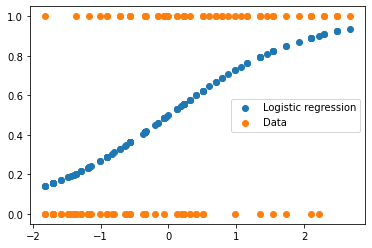

In [10]:
prob_is_car = logistic_model.predict()
log_odds_is_car = logit(prob_is_car)

plt.figure()
plt.scatter(log_odds_is_car, prob_is_car, label="Logistic regression")
plt.scatter(log_odds_is_car, cb_df["is_car"], label = "Data")
plt.legend()
plt.show()

### Question

For journeys with 2 people, plot the probability of going by car (as opposed to train) as a function of household income. Use this figure to find out the income at which it becomes more likely they will travel by car.

### Question

Plot the probability of going by car for 1, 2, and 3 people as a function of income. What do you notice about the change in the probability as a function of income?

## Bonus Example: Multiple logistic regression

### Question

Set up a multiple logistic regression model to predict the mode of transport used based on all of the data.